# 4.9 Part 2 - Initial graphs for final project

### This script contains the following points:

#### 1. Import libraries
#### 2. Import data
#### 3. Bar chart
#### 4. Scatterplot
#### 5. Histogram
#### 6. Sampling
#### 7. Line chart
#### 8. Hour of day histogram
#### 9. Loyalty bar chart
#### 10. Expenditure line chart
#### 11. Demographics line chart
#### 12. Spending power scatterplot

# Import libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Import data

In [2]:
# project folder path

path = r'C:\Users\Odette\Desktop\CareerFoundry\Immersion Courses\Course 4\Instacart Basket Analysis'

In [3]:
# import of orders_products data

df = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_final.pkl'))

In [4]:
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,median_order_days,order_frequency,gender,state,age,date_joined,n_dependants,fam_status,income,_merge
0,2539329,1,1,2,8,0,196,1,False,Soda,...,20.0,Regular customer,Female,Alabama,31,2019-02-17,3,married,40423,both
1,2398795,1,2,3,7,15,196,1,True,Soda,...,20.0,Regular customer,Female,Alabama,31,2019-02-17,3,married,40423,both
2,473747,1,3,3,12,21,196,1,True,Soda,...,20.0,Regular customer,Female,Alabama,31,2019-02-17,3,married,40423,both
3,2254736,1,4,4,7,29,196,1,True,Soda,...,20.0,Regular customer,Female,Alabama,31,2019-02-17,3,married,40423,both
4,431534,1,5,4,15,28,196,1,True,Soda,...,20.0,Regular customer,Female,Alabama,31,2019-02-17,3,married,40423,both


In [5]:
df.shape

(32404859, 29)

# Bar chart

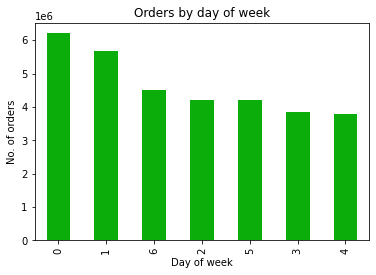

In [6]:
# bar chart based on order of values

bar = df['orders_day_of_week'].value_counts().plot.bar(color =['#0AAD0A'], xlabel= 'Day of week', ylabel= 'No. of orders', title = 'Orders by day of week')

In [7]:
# export chart in the form of an image file

bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

# Scatterplot

Text(0.5, 1.0, 'Price on price comparison')

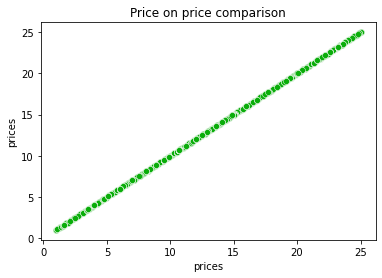

In [8]:
# plotting price against price instead of a second variable as an exploratory check of the data

scatter = sns.scatterplot(x = 'prices', y = 'prices', data = df, color = '#0AAD0A')
scatter.set_title('Price on price comparison')

# Histogram

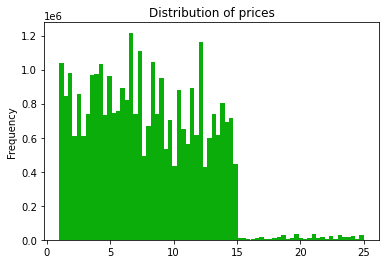

In [9]:
# plot a histogram chart based on prices

hist = df['prices'].plot.hist(bins = 70, color = ['#0AAD0A'], title = 'Distribution of prices')

In [10]:
# export chart

hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'histogram_prices.png'))

# Sampling

In [5]:
# creating a list holding True/False values (70/30 ratio)

np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [6]:
# store 70% of the sample in the dataframe big

big = df[dev]

In [7]:
# store 30% of the sample in the dataframe small

small = df[~dev]

In [14]:
# check how many rows in original dataframe

len(df)

32404859

In [15]:
# check rows in big and small add up to original

len(big) + len(small)

32404859

In [8]:
# create dataframe with just 'orders_day_of_week' and 'prices'

df_2 = small[['orders_day_of_week','prices']]

In [17]:
df_2.tail()

,orders_day_of_week,prices
32404841,2,10.703125
32404842,6,10.703125
32404843,0,10.703125
32404849,1,10.703125
32404850,4,10.703125


# Line chart

Text(0.5, 1.0, 'Development of prices across the days of the week')

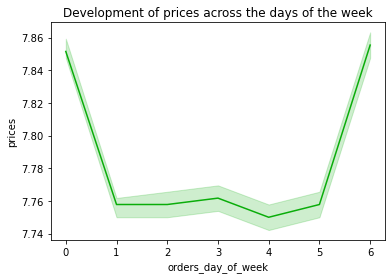

In [18]:
# create line chart

line = sns.lineplot(data = df_2, x = 'orders_day_of_week', y = 'prices', color = '#0AAD0A')
line.set_title('Development of prices across the days of the week')

In [19]:
# export chart

line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_by_dow.png'))

# Hour of day histogram

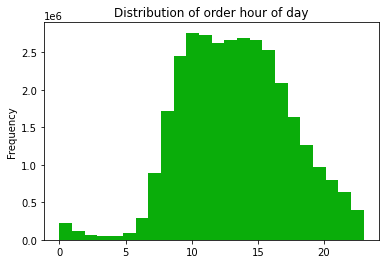

In [20]:
# plot a histogram chart based on order_hour_of_day

hist2 = df['order_hour_of_day'].plot.hist(bins = 24, color = ['#0AAD0A'], title = 'Distribution of order hour of day', x = 'hour of day')

#df['order_hour_of_day'].apply(lambda x: '%.5f' % x, axis = 1)  # suppress scientific notation (not working!)

The histogram is slightly right skewed and demonstrates that more orders are made from the late morning until the early evening (between 8am & 6pm). However, as the mean (13.43) and median (13) are very close, it can be considered that the time of day is nearly evenly distributed, or that there are nearly the same amount of orders on either side of 1pm. It is also unimodal with most orders occuring at 10am, followed by 11am and 2pm.

In [21]:
# export chart

hist2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hr_of_day_distribution.png'))

# Loyalty bar chart

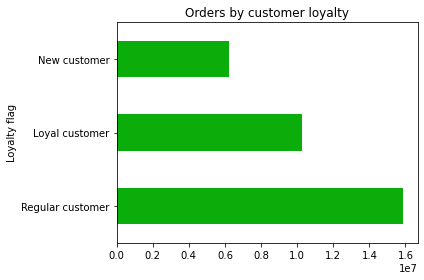

In [16]:
# bar chart based on customer loyalty

bar2 = df['loyalty_flag'].value_counts().plot.barh(color =['#0AAD0A'], xlabel= 'Loyalty flag', ylabel= 'No. of orders', title = 'Orders by customer loyalty')
plt.tight_layout()

In [18]:
# export chart

bar2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_customer_loyalty.png'))

# Expenditure line chart

In [24]:
# create dataframe with just 'order_hour_of_day' and 'prices'

df_3 = small[['order_hour_of_day','prices']]

In [25]:
df_3.tail()

,order_hour_of_day,prices
32404841,12,10.703125
32404842,3,10.703125
32404843,1,10.703125
32404849,18,10.703125
32404850,20,10.703125


Text(0.5, 1.0, 'Development of expenditure depending on hour of the day')

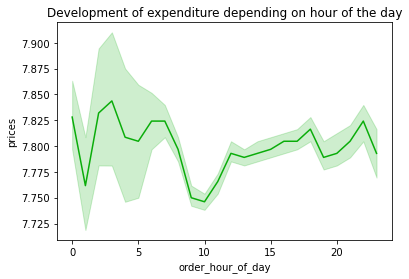

In [26]:
# create line chart

line2 = sns.lineplot(data = df_3, x = 'order_hour_of_day', y = 'prices', color = '#0AAD0A')
line2.set_title('Development of expenditure depending on hour of the day')

In [27]:
# Note: although most orders occur at 10am (histogram), it also has the lowest expenditure according to the line chart.
# Note2: Although the fewest orders occur between 0 and 5am (hist), there is higher expenditure at this time

In [28]:
# export chart

line2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_hr_of_day_expenditure.png'))

# Demographics line chart

In [9]:
# create dataframe with just 'age' and 'n_dependants'

df_4 = small[['age','n_dependants']]

In [23]:
df_4.tail()

,age,n_dependants
32404841,25,0
32404842,25,0
32404843,25,0
32404849,25,0
32404850,25,0


Text(0.5, 1.0, 'Average number of dependents by customer age')

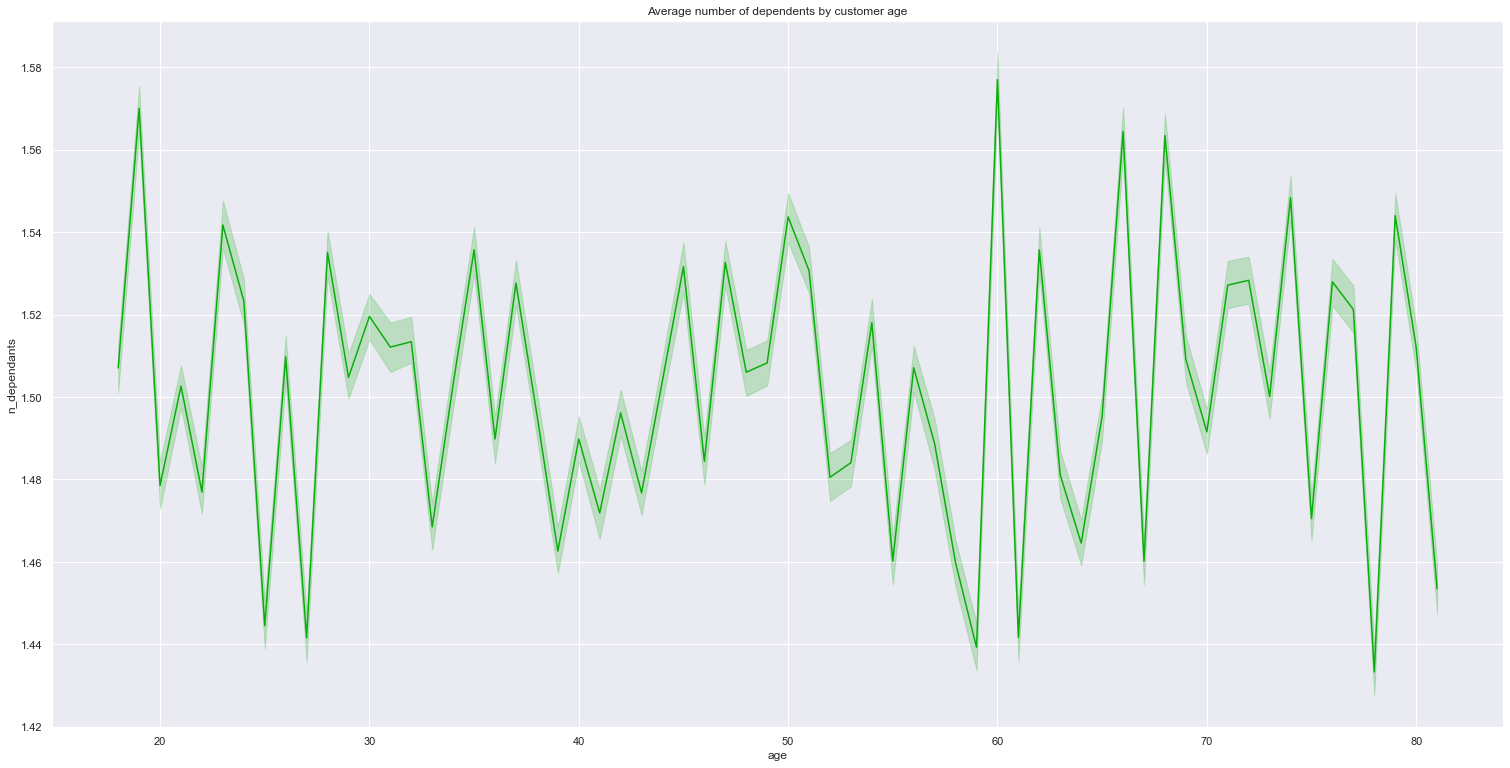

In [32]:
# create line chart

line3 = sns.lineplot(data = df_4, x = 'age', y = 'n_dependants', color = '#0AAD0A')
line3.set_title('Average number of dependents by customer age')

The line chart shows that the average age of shoppers is 49.5 with an average number of dependants by age to be 1.5 dependents. Customers aged 19, 60, 66 & 68 had more dependents on average. Those aged 25, 27, 59, 61 & 78 had fewer dependents on average

In [15]:
# export chart

line3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dependents_by_age.png'))

# Spending power scatterplot

Text(0.5, 1.0, 'Relationship between age and spending power')

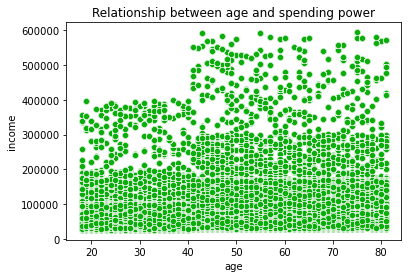

In [44]:
# plotting age against income

scatter2 = sns.scatterplot(x = 'age', y = 'income', data = df, color = '#0AAD0A')
scatter2.set_title('Relationship between age and spending power')

The scatterplot shows there's a clear difference in purchasing power between under & over 40's. Those under 40 earn less, averaging a max of 400,000,  whilst those over 40 earn an average max of 600,000, which is 50% more. This demonstrates a slight positive correlation between age and spending power

In [45]:
# export chart

scatter2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_spending_power'))